In [1]:
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
import plotly.express as px
from pyecharts.globals import ThemeType
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import matplotlib as ml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
ml.style.use('ggplot')
from IPython.display import HTML

In [2]:
# pip install plotly
# pip install bubbly
# pip install pyecharts==1.7.1

In [4]:
data = pd.read_csv('dataset1.csv') 
data.head()

,CountryName,Migrant,Industry,FemaleMortality,MaleMortality,Age(0-14),Age(15-64),Agriculture,Population,Death(0-5),Service,Region,IncomeGroup,CountryCode
0,Afghanistan,0.325021,21.862341,253.2590,296.6840,47.589344,50.135406,27.091540,2.736886,114576.0,51.046119,South Asia,Low income,AFG
1,Albania,3.058886,28.690547,51.2588,97.9992,21.425123,67.620059,20.658189,-0.496462,540.0,50.651265,Europe & Central Asia,Upper middle income,ALB
2,Algeria,0.672447,53.853213,93.8790,142.4640,27.191308,67.257704,9.029438,1.776047,24683.0,37.117349,Middle East & North Africa,Upper middle income,DZA
3,American Samoa,50.992163,NaN,NaN,NaN,NaN,NaN,NaN,-1.054881,NaN,NaN,East Asia & Pacific,Upper middle income,ASM
4,Andorra,66.154539,13.760281,NaN,NaN,NaN,NaN,0.463861,-1.241974,2.0,77.770302,Europe & Central Asia,High income: nonOECD,ADO


### Veri Ön İşleme

<AxesSubplot:>

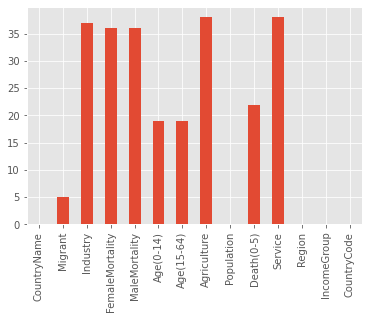

In [5]:
dd = data.isnull().sum()

dd.plot.bar()

In [6]:
data.describe()

,Migrant,Industry,FemaleMortality,MaleMortality,Age(0-14),Age(15-64),Agriculture,Population,Death(0-5),Service
count,209.000000,177.000000,178.000000,178.000000,195.000000,195.000000,176.000000,214.000000,1.920000e+02,176.000000
mean,11.111255,28.385815,154.472289,217.866116,28.852485,63.430890,12.540303,1.365607,3.652580e+04,58.790716
std,16.512860,13.987567,112.003129,107.848870,10.781331,7.175876,12.426409,1.675547,1.379678e+05,14.898042
min,0.050870,4.860609,33.574000,68.561000,12.060007,47.517486,0.000000,-9.816607,1.000000e+00,2.428377
25%,1.470190,19.601917,75.403550,133.120300,19.101513,57.593753,2.791394,0.461100,3.570000e+02,48.884035
50%,3.728758,27.107862,115.471000,201.410500,27.510341,65.404598,8.187382,1.247934,2.980500e+03,60.524945
75%,12.073076,34.380456,216.481250,285.874250,38.237773,68.000645,19.101433,2.240711,2.475825e+04,69.393220
max,101.741552,96.736098,616.849000,607.728000,49.963074,85.963016,56.024708,10.398365,1.595122e+06,92.833614


In [7]:
data["Migrant"].fillna(data["Migrant"].mean(),inplace=True) 
data["Industry"].fillna(data["Industry"].mean(),inplace=True) 
data["FemaleMortality"].fillna(data["FemaleMortality"].mean(),inplace=True) 
data["MaleMortality"].fillna(data["MaleMortality"].mean(),inplace=True) 
data["Age(0-14)"].fillna(data["Age(0-14)"].mean(),inplace=True) 
data["Age(15-64)"].fillna(data["Age(15-64)"].mean(),inplace=True) 
data["Agriculture"].fillna(data["Agriculture"].mean(),inplace=True) 
data["Population"].fillna(data["Population"].mean(),inplace=True) 
data["Death(0-5)"].fillna(data["Death(0-5)"].mean(),inplace=True) 
data["Service"].fillna(data["Service"].mean(),inplace=True) 


In [8]:
data.head()

,CountryName,Migrant,Industry,FemaleMortality,MaleMortality,Age(0-14),Age(15-64),Agriculture,Population,Death(0-5),Service,Region,IncomeGroup,CountryCode
0,Afghanistan,0.325021,21.862341,253.259000,296.684000,47.589344,50.135406,27.091540,2.736886,114576.000000,51.046119,South Asia,Low income,AFG
1,Albania,3.058886,28.690547,51.258800,97.999200,21.425123,67.620059,20.658189,-0.496462,540.000000,50.651265,Europe & Central Asia,Upper middle income,ALB
2,Algeria,0.672447,53.853213,93.879000,142.464000,27.191308,67.257704,9.029438,1.776047,24683.000000,37.117349,Middle East & North Africa,Upper middle income,DZA
3,American Samoa,50.992163,28.385815,154.472289,217.866116,28.852485,63.430890,12.540303,-1.054881,36525.796875,58.790716,East Asia & Pacific,Upper middle income,ASM
4,Andorra,66.154539,13.760281,154.472289,217.866116,28.852485,63.430890,0.463861,-1.241974,2.000000,77.770302,Europe & Central Asia,High income: nonOECD,ADO


In [9]:
Southdata=data[data["Region"]=="South Asia"]["Migrant"].max()
Europedata=data[data["Region"]=="Europe & Central Asia"]["Migrant"].max()
Middledata=data[data["Region"]=="Middle East & North Africa"]["Migrant"].max()
Eastdata=data[data["Region"]=="East Asia & Pacific"]["Migrant"].max()
Latindata=data[data["Region"]=="Latin America & Caribbean"]["Migrant"].max()
Subdata=data[data["Region"]=="Sub-Saharan Africa"]["Migrant"].max()
Northdata=data[data["Region"]=="North America"]["Migrant"].max()
Southdata2=data[data["Region"]=="South Asia"]["Industry"].max()
Europedata2=data[data["Region"]=="Europe & Central Asia"]["Industry"].max()
Middledata2=data[data["Region"]=="Middle East & North Africa"]["Industry"].max()
Eastdata2=data[data["Region"]=="East Asia & Pacific"]["Industry"].max()
Latindata2=data[data["Region"]=="Latin America & Caribbean"]["Industry"].max()
Subdata2=data[data["Region"]=="Sub-Saharan Africa"]["Industry"].max()
Northdata2=data[data["Region"]=="North America"]["Industry"].max()

alg_deger = {'0':Southdata,'1':Europedata,'2':Middledata,'3':Eastdata,'4':Latindata,'5':Subdata,'6':Northdata}
alg_deger2 = {'0':Southdata2,'1':Europedata2,'2':Middledata2,'3':Eastdata2,'4':Latindata2,'5':Subdata2,'6':Northdata2}
alg_isim={'0':'South Asia','1':'Europe & Central Asia','2':'Middle East & North Africa','3':'East Asia & Pacific','4':'Latin America & Caribbean','5':'Sub-Saharan Africa','6':'North America'}
alg_isimdf=pd.Series(alg_isim) 
alg_degerdf=pd.Series(alg_deger)
alg_degerdf2=pd.Series(alg_deger2)
df=pd.DataFrame({'Region':alg_isimdf,'Migrant':alg_degerdf,'Industry':alg_degerdf2})


In [10]:
HTML('''<div class="flourish-embed flourish-parliament" data-src="visualisation/4979205"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [11]:
HTML('''<div class="flourish-embed flourish-hierarchy" data-src="visualisation/4979374"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [12]:
from bubbly.bubbly import bubbleplot 

figure = bubbleplot(dataset=data, x_column='Migrant', y_column='Population', 
    bubble_column='Region', size_column='Migrant', color_column='Region', 
    x_title="Migrant", y_title="Population", title='The Interregional Exchange of Migration and Population Data',
    x_logscale=True, scale_bubble=6, height=650)

iplot(figure, config={'scrollzoom': True})

C:\Users\belgi\anaconda3\lib\site-packages\plotly\offline\offline.py:157: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [13]:
data2 = [ dict(
        type = 'choropleth',
        locations = data['CountryCode'],
        z = data['Migrant'],
        text =data.index,
        zmin=0,zmax=100,
        colorscale='Blues',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.4
            ) )
      ) ]

layout = dict(
    autosize=True,
    height=500,
    title = 'Change in the Number of Migration in 2010 in Countries',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        showocean=True,
        projection = dict(
            type = 'orthographic'
        )
    )
)

fig = dict(data=data2, layout=layout)
iplot(fig)

In [14]:
trace1 = go.Scatter(
    x = data.index,
    y = data.FemaleMortality,
    mode = 'lines+markers',
    name = 'Female Mortality',
    marker = dict(color = 'rgba(255, 0, 255, 0.5)'),
    text = data.index)

trace2 = go.Scatter(
    x = data.index,
    y = data.MaleMortality,
    mode = 'lines+markers',
    name = 'Male Mortality',
    marker = dict(color = '#bf00bf'),
    text = data.index)

trace3 =go.Scatter(
                x = data.index,
                y = data['Migrant'],
    mode = 'lines+markers',
                name = "Migrant",
                 marker = dict(color = '#ff007f'),
    text = data.index)
data1 = [trace1, trace2,trace3]
layout = dict(title ='Change of Female and Male Mortality Percentage by Country',
             xaxis= dict(zeroline= False))
fig = dict(data = data1, layout = layout)



iplot(fig)

In [15]:
fig = px.sunburst(data,
                  path=["Region", data.index], values="Age(0-14)", title='Age(0-14)',
                  color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

#fig=px.sunburst(data, path=["Region", data.index], values="Age(15-64)",title="Age(15-64)", hover_name=data.index)

In [16]:
dataSector=data.loc[:,['Region','Agriculture','Industry','Service']]

sector_scatter = px.scatter_3d(dataSector, x='Agriculture', y='Industry', z='Service',
                    color=data.index,
                    title='Sectoral Distribution',  
                   )
sector_scatter.show()
